<a href="https://colab.research.google.com/github/Jonathan-code-hub/Many-Mini-OR-Problems/blob/main/LP_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2: An insurance company believes that it will require the
following numbers of personal computers during the next
six months: January, 9; February, 5; March, 7; April, 9;
May, 10; June, 5. Computers can be rented for a period of
one, two, or three months at the following unit rates: onemonth rate, \$200; two-month rate, $350; three-month rate,
\$450. Formulate an LP that can be used to minimize the
cost of renting the required computers. You may assume that
if a machine is rented for a period of time extending beyond
June, the cost of the rental should be prorated. For example,
if a computer is rented for three months at the beginning of
May, then a rental fee of 2/3(450)  \$300, not \$450, should
be assessed in the objective function.

In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.7 MB/s eta 0:00:00


In [19]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum
model = LpProblem("PC_Rental_Planning", LpMinimize)

# Variables #
M = [1,2,3,4,5,6]
K = [1,2,3]

# Parameters #
d = {1:9, 2:5, 3:7, 4:9, 5:10, 6:5}
r = {1:200, 2:350, 3:450}

# Helpers #

def used_months(t, k):
  return min(k, 6 - t + 1)

def prorated_cost(t, k):
  return r[k] * used_months(t, k) / k

def covers(m, t, k):
  return 1 if (t <= m <= t + k and m <= 6) else 0

# Decision Variables #
x = {(t, k): LpVariable(f"x_{t}_{k}", cat="Binary") for t in M for k in K}

# Objective Function #

model += lpSum(prorated_cost(t, k) * x[(t, k)] for t in M for k in K)

# Constraints #

for m in M:
    model += lpSum(covers(m,t,k) * x[(t,k)] for t in M for k in K) >= d[m]

# Solve #
model.solve()

sol = {(t,k): x[(t,k)].value() for t in M for k in K}

print(sol)

{(1, 1): 1.0, (1, 2): 1.0, (1, 3): 7.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 1.0, (3, 1): 0.0, (3, 2): 1.0, (3, 3): 1.0, (4, 1): 1.0, (4, 2): 1.0, (4, 3): 2.0, (5, 1): 1.0, (5, 2): 1.0, (5, 3): 1.0, (6, 1): 0.0, (6, 2): 0.0, (6, 3): 0.0}


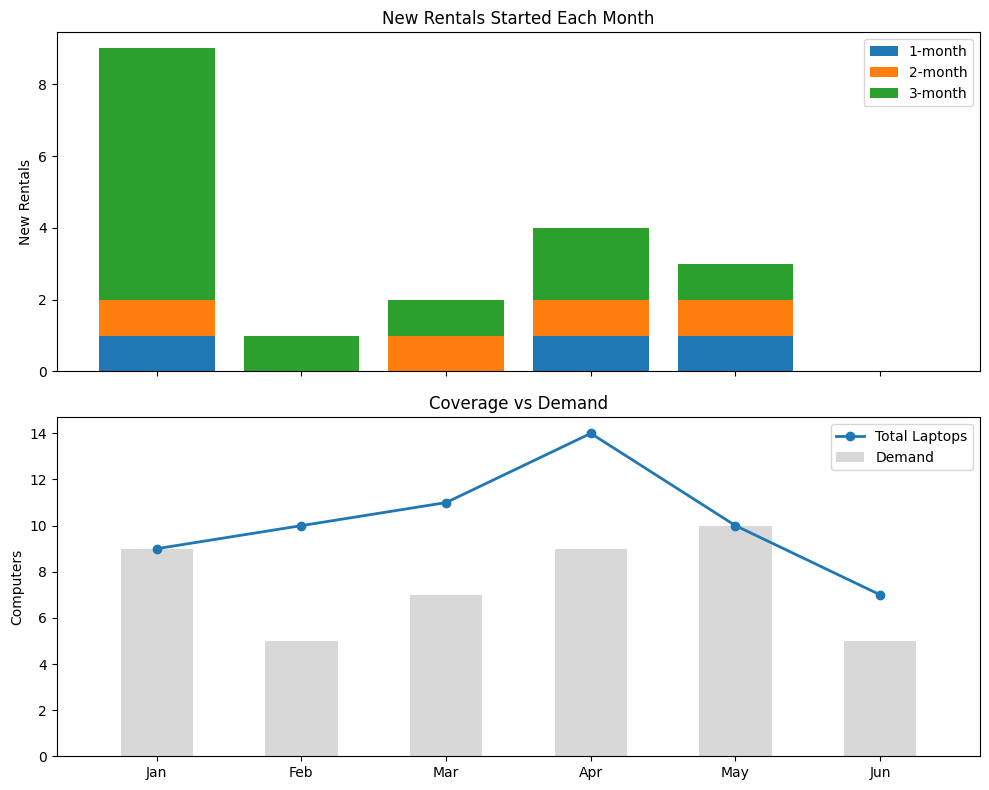

In [25]:
import matplotlib.pyplot as plt
import numpy as np

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

# --- New rentals started each month --- #
new_rentals = {k: [sol[(t,k)] for t in M] for k in K}

fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# Plot new rentals as stacked bars #
bottom = np.zeros(len(M))
colors = {1:"tab:blue", 2:"tab:orange", 3:"tab:green"}
for k in K:
    vals = new_rentals[k]
    axes[0].bar(M, vals, bottom=bottom, color=colors[k], label=f"{k}-month")
    bottom += np.array(vals)

axes[0].set_ylabel("New Rentals")
axes[0].set_title("New Rentals Started Each Month")
axes[0].legend()

# --- Total coverage vs demand --- #
coverage = []
for m in M:
    total = sum(covers(m,t,k) * sol[(t,k)] for t in M for k in K)
    coverage.append(total)

axes[1].bar(M, d.values(), width=0.5, alpha=0.3, color="gray", label="Demand")
axes[1].plot(M, coverage, marker="o", linewidth=2, label="Total Laptops")

axes[1].set_xticks(M)
axes[1].set_xticklabels(months)
axes[1].set_ylabel("Computers")
axes[1].set_title(f"Coverage vs Demand")
axes[1].legend()

plt.tight_layout()
plt.show()
